In [1]:
!pip install python-dotenv
!pip install requests
!pip install selenium
!pip install folium

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


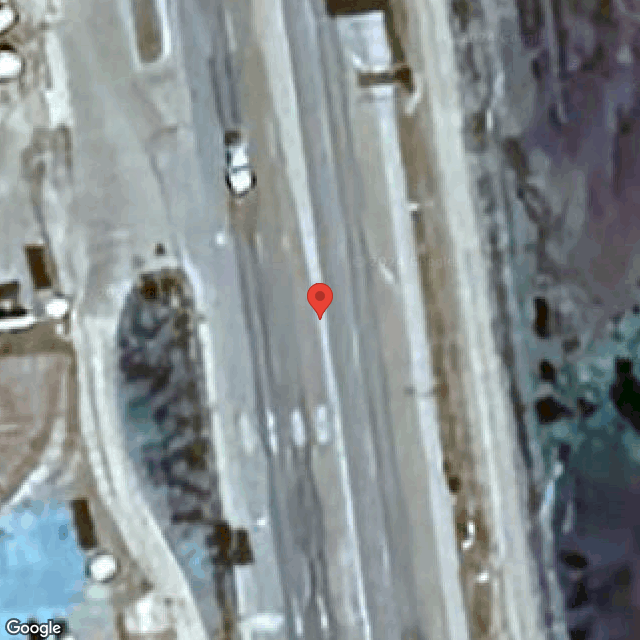

In [2]:
import os
from dotenv import load_dotenv
import requests
from IPython.display import Image, display

load_dotenv()

def MapImage(api_key, latitude, longitude, zoom=20, size=(1000, 1000)):
    url = "https://maps.googleapis.com/maps/api/staticmap"
    params = {
        "center": f"{latitude},{longitude}",
        "zoom": zoom,
        "size": f"{size[0]}x{size[1]}",
        "maptype": "satellite",
        "markers": f"color:red|{latitude},{longitude}",
        "key": api_key
    }

    response = requests.get(url, params=params)
    if response.status_code == 200:
        return Image(response.content)
    else:
        print("Error fetching the satellite image:", response.status_code)
        return None

API = os.getenv('APIKEY')


latitude = float(input("위도를 입력하세요: "))
longitude = float(input("경도를 입력하세요: "))

satMarker = MapImage(API, latitude, longitude)
if satMarker:
    display(satMarker)
